<a href="https://colab.research.google.com/github/river-san/mysite/blob/master/santander_recommend_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from google.colab import drive
drive.mount('/content/drive')

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk('/content/drive/MyDrive/python'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Mounted at /content/drive
/content/drive/MyDrive/python/2-Santander-A.pdf
/content/drive/MyDrive/python/2-Santander-B.pdf
/content/drive/MyDrive/python/train_ver2.csv.zip
/content/drive/MyDrive/python/test_ver2.csv.zip
/content/drive/MyDrive/python/sample_submission.csv.zip


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/python/test_ver2.csv.zip",encoding="latin1", compression="zip")
test.head(5)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,NaN,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,NaN,1.0,A,S,N,NaN,KHE,N,1,15.0,"CORUÃA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,NaN,1.0,I,S,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [ ]:
#データ件数
cnt = test.count()
print(cnt)

fecha_dato               929615
ncodpers                 929615
ind_empleado             929615
pais_residencia          929615
sexo                     929610
age                      929615
fecha_alta               929615
ind_nuevo                929615
antiguedad               929615
indrel                   929615
ult_fec_cli_1t             1683
indrel_1mes              929592
tiprel_1mes              929592
indresi                  929615
indext                   929615
conyuemp                    104
canal_entrada            927534
indfall                  929615
tipodom                  929615
cod_prov                 925619
nomprov                  925619
ind_actividad_cliente    929615
renta                    929615
segmento                 927367
dtype: int64


In [ ]:
ucnt = test['ncodpers'].nunique()
print("ncodpers:count=[",ucnt,"]")

ncodpers:count=[ 929615 ]


In [ ]:
sample = pd.read_csv("/content/drive/MyDrive/python/sample_submission.csv.zip",encoding="latin1", compression="zip")
sample.head(5)

,ncodpers,added_products
0,15889,ind_tjcr_fin_ult1
1,15890,ind_tjcr_fin_ult1
2,15892,ind_tjcr_fin_ult1
3,15893,ind_tjcr_fin_ult1
4,15894,ind_tjcr_fin_ult1


In [ ]:
#データ件数
cnt = sample.count()
print(cnt)

ncodpers          929615
added_products    929615
dtype: int64


In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/python/train_ver2.csv.zip",encoding="latin1", compression="zip",nrows=10000)
trn = pd.read_csv("/content/drive/MyDrive/python/train_ver2.csv.zip",encoding="latin1", compression="zip")
trn.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
#データ件数
#cnt = trn.count()
#print(cnt)
trn.shape

(13647309, 48)

In [ ]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [ ]:
#カラムのユニーク値
for col in trn.columns:
    print(col,":",'{}\n'.format(trn[col].unique()))

fecha_dato : ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']

ncodpers : [1375586 1050611 1050612 ... 1173729 1164094 1550586]

ind_empleado : ['N' nan 'A' 'B' 'F' 'S']

pais_residencia : ['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ' 'ZW' 'DJ' 'JM' 'BM' 'MT']

sexo : ['H' 'V' nan]

age : [

In [ ]:
#カラムのユニーク値の個数
for col in trn.columns:
    print('{}\n'.format(trn[col].value_counts()))

2016-05-28    931453
2016-04-28    928274
2016-03-28    925076
2016-02-28    920904
2016-01-28    916269
2015-12-28    912021
2015-11-28    906109
2015-10-28    892251
2015-09-28    865440
2015-08-28    843201
2015-07-28    829817
2015-06-28    632110
2015-05-28    631957
2015-04-28    630367
2015-03-28    629209
2015-02-28    627394
2015-01-28    625457
Name: fecha_dato, dtype: int64

32752      17
1273696    17
1224536    17
1199940    17
1208128    17
           ..
1549150     1
1543059     1
1535935     1
1551255     1
1489485     1
Name: ncodpers, Length: 956645, dtype: int64

N    13610977
B        3566
F        2523
A        2492
S          17
Name: ind_empleado, dtype: int64

ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
ZW          11
DJ          11
JM          11
BM           6
MT           2
Name: pais_residencia, Length: 118, dtype: int64

V    7424252
H    6195253
Name: sexo, dtype: int64

23     542682
24     527526
22     52462

In [ ]:
# 5. 数値型変数の確認（コード2-6）
num_cols=[col for col in trn.columns[:24] if trn[col].dtype in ['int64','float64']]
trn[num_cols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


In [ ]:
# 6. カテゴリ変数の確認（コード2-7）
cat_cols=[col for col in trn.columns[:24] if trn[col].dtype in ['O']]
trn[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [ ]:
# 7. カテゴリ変数の固有値を表示

for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-' * 50)
    print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

In [ ]:
# 可視化のための準備（69ページ）
import matplotlib
import matplotlib.pyplot as plt
# Jupyter Notebook内部にグラフを出力するように設定
%matplotlib inline
import seaborn as sns

KeyboardInterrupt: ignored

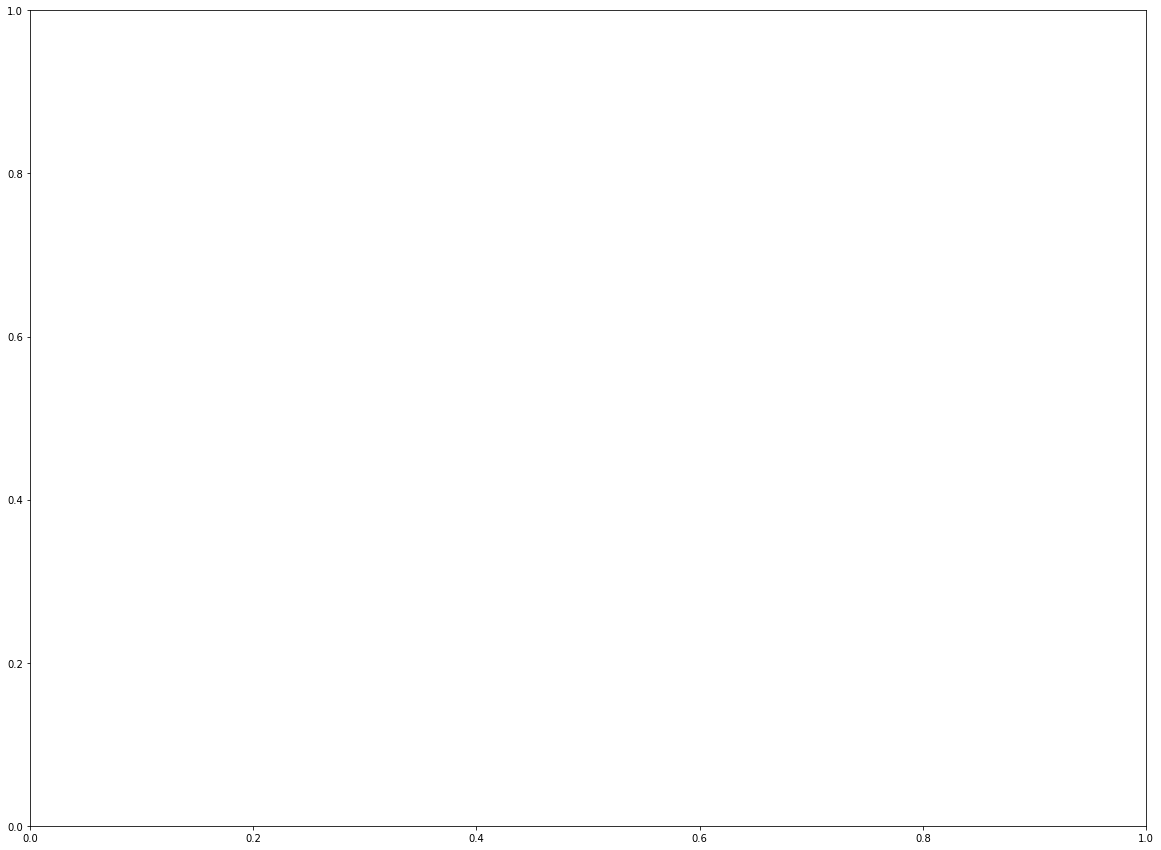

In [ ]:
# 8. 変数を棒グラフで可視化（コード2-9）

skip_cols = ['ncodpers', 'renta']
for col in trn.columns:
    # 出力に時間がかかりすぎる2つの変数をskipします。
    if col in skip_cols:
        continue
        
    # 見やすくするため、領域区分と変数名を出力します。
    print('='*50)
    print('col : ', col)
    
    # グラフの大きさ(figsize)を設定します。
    f, ax = plt.subplots(figsize=(20, 15))
    # seabornを使用した棒グラフを設定します。
    sns.countplot(x=col, data=trn, alpha=0.5)
    # show()関数によって可視化します。
    plt.show()